In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
class Benchmarking(object):
    def __init__(self, filename):
        self.filename = filename
        df = None
    def crunch_numbers(self, savecsv=False):
        df = pd.read_csv(self.filename+'.csv', sep=',')
        df['BEST'] = df[[col for col in df.columns if 'RUN' in col]].min(axis=1)
        df['MEAN'] = df[[col for col in df.columns if 'RUN' in col]].mean(axis=1)
        df
        df['MEAN'] = df['MEAN'].round(2)
        df['EFF_BEST'] = df[df['CORES'] == 1]['BEST'].values[0]*100/(df['CORES']*df['BEST'])
        df['EFF_BEST'] = df['EFF_BEST'].round(2)
        df['EFF_MEAN'] = df[df['CORES'] == 1]['MEAN'].values[0]*100/(df['CORES']*df['MEAN'])
        df['EFF_MEAN'] = df['EFF_MEAN'].round(2)
        if savecsv:
            df.to_csv(self.filename+'_out.csv', sep=',')
        self.df = df
        return df

    def plot_times(self, graphname=False, savegraph=False):
        plt.xticks(self.df.index.values, self.df.CORES.values)
        best = plt.plot(self.df.index, self.df['BEST'])
        mean = plt.plot(self.df.index.values, self.df['MEAN'].values)
        plt.grid()
        plt.ylabel("Time (s)")
        plt.xlabel("Number of cores")
        plt.suptitle("Benchmark plot")
        if graphname:
            plt.suptitle(graphname)
        plt.legend((best[0], mean[0]), ('Best', 'Mean'))
        if savegraph:
            plt.savefig(self.filename+'_out.png', bbox='tight')
        plt.show()
        
def get_all_data(filename, savegraph=False, graphname=False, savecsv=False):
    bench = Benchmarking(filename)
    bench.crunch_numbers(savecsv=savecsv)
    bench.plot_times(graphname=graphname, savegraph=savegraph)
    return bench.df

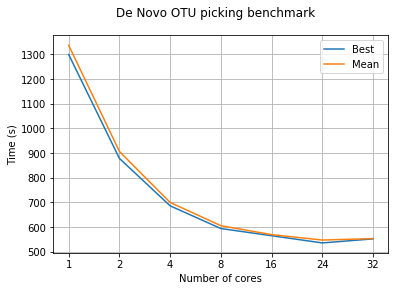

,CORES,RUN1,RUN2,BEST,MEAN,EFF_BEST,EFF_MEAN
0,1,1374.81,1299.94,1299.94,1337.38,100.00,100.00
1,2,935.03,878.43,878.43,906.73,73.99,73.75
2,4,713.51,686.04,686.04,699.78,47.37,47.78
3,8,616.97,593.95,593.95,605.46,27.36,27.61
4,16,564.81,573.63,564.81,569.22,14.38,14.68
5,24,558.90,535.61,535.61,547.26,10.11,10.18
6,32,552.04,554.49,552.04,553.26,7.36,7.55


In [5]:
get_all_data('de_novo_otus', 
             savegraph=True, 
             graphname='De Novo OTU picking benchmark', 
             savecsv=True)

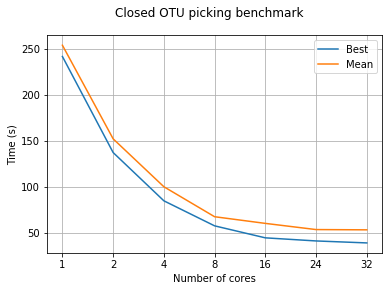

,CORES,RUN1,RUN2,RUN3,RUN4,RUN5,RUN6,RUN7,BEST,MEAN,EFF_BEST,EFF_MEAN
0,1,241.40,250.90,242.50,269.38,259.08,268.78,243.38,241.40,253.63,100.00,100.00
1,2,137.82,145.05,137.07,162.44,149.22,165.89,166.29,137.07,151.97,88.06,83.45
2,4,86.65,87.78,84.65,95.36,121.99,110.50,112.59,84.65,99.93,71.29,63.45
3,8,59.15,57.46,57.94,65.98,65.11,82.52,83.40,57.46,67.37,52.51,47.06
4,16,49.91,62.44,48.75,93.18,52.55,44.43,69.68,44.43,60.13,33.96,26.36
5,24,56.87,56.30,48.44,41.06,41.23,66.40,63.65,41.06,53.42,24.50,19.78
6,32,53.43,48.87,38.92,42.15,58.72,68.67,61.12,38.92,53.13,19.38,14.92


In [6]:
get_all_data('closed_otus', 
             savegraph=True, 
             graphname='Closed OTU picking benchmark', 
             savecsv=True)

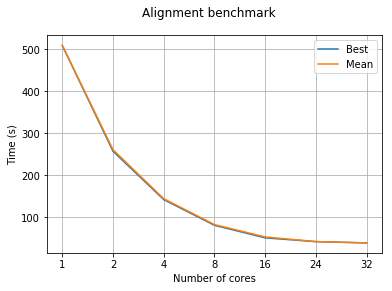

,CORES,RUN1,RUN2,BEST,MEAN,EFF_BEST,EFF_MEAN
0,1,508.72,509.99,508.72,509.36,100.00,100.00
1,2,264.36,257.06,257.06,260.71,98.95,97.69
2,4,146.26,141.94,141.94,144.10,89.60,88.37
3,8,84.17,80.77,80.77,82.47,78.73,77.20
4,16,55.18,50.89,50.89,53.04,62.48,60.02
5,24,41.85,42.15,41.85,42.00,50.65,50.53
6,32,38.84,38.92,38.84,38.88,40.93,40.94


In [7]:
get_all_data('alignment', 
             savegraph=True, 
             graphname='Alignment benchmark', 
             savecsv=True)